In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


### 1 Data Collection


In [3]:
now = datetime.now()

start=datetime(now.year-10, now.month, now.day)
end= now
ticker = 'AAPL'
df =yf.download(ticker, start , end)
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2016-01-11   22.215450   22.334949   21.947142   22.314657  198957600
2016-01-12   22.537878   22.702471   22.285352   22.670906  196616800
2016-01-13   21.958427   22.815210   21.938136   22.619052  249758400
2016-01-14   22.438667   22.655119   21.586395   22.086936  252680400
2016-01-15   21.899801   22.030574   21.500722   21.690115  319335600
...                ...         ...         ...         ...        ...
2026-01-05  267.260010  271.510010  266.140015  270.640015   45647200
2026-01-06  262.359985  267.549988  262.119995  267.000000   52352100
2026-01-07  260.329987  263.679993  259.809998  263.200012   48309800
2026-01-08  259.040009  259.290009  255.699997  257.019989   50419300
2026-01-09  259.369995  260.209991  256.220001  259.079987   39952300

[2515 rows x 5 colu

### 2 Data Exploration & Visualization

In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600
2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800
2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400
2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400
2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600
...,...,...,...,...,...
2026-01-05,267.260010,271.510010,266.140015,270.640015,45647200
2026-01-06,262.359985,267.549988,262.119995,267.000000,52352100


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 5)

In [7]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,114.829143,115.968642,113.578365,114.723489,1.012985e+08
std,73.580935,74.283637,72.813934,73.517990,5.749193e+07
min,20.604073,20.907412,20.405651,20.526531,1.791060e+07
25%,41.600977,41.979046,41.310561,41.594997,6.130235e+07
50%,121.078003,122.409319,119.384799,121.039077,8.859800e+07
75%,171.902832,173.436050,170.305574,171.629635,1.240488e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600
2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800
2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400
2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400
2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600
1,2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800
2,2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400
3,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400
4,2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600


Text(0, 0.5, 'Close price')

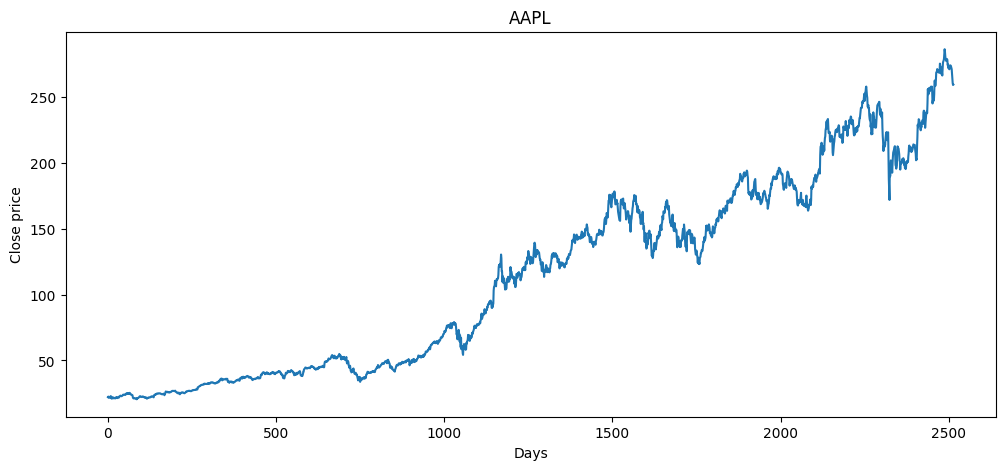

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

### Feature Engineering

In [14]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


#### 100 days Moving Average

In [15]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600,NaN
1,2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800,NaN
2,2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400,NaN
3,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400,NaN
4,2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600,NaN


In [16]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600,NaN
1,2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800,NaN
2,2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400,NaN
3,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400,NaN
4,2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600,NaN
...,...,...,...,...,...,...,...
98,2016-06-01,22.456028,22.702347,22.426379,22.583748,116693200,NaN
99,2016-06-02,22.287256,22.314624,22.038656,22.259887,160766400,22.695630
100,2016-06-03,22.332872,22.412697,22.225678,22.303224,114019600,22.696804


Text(0, 0.5, 'Close price')

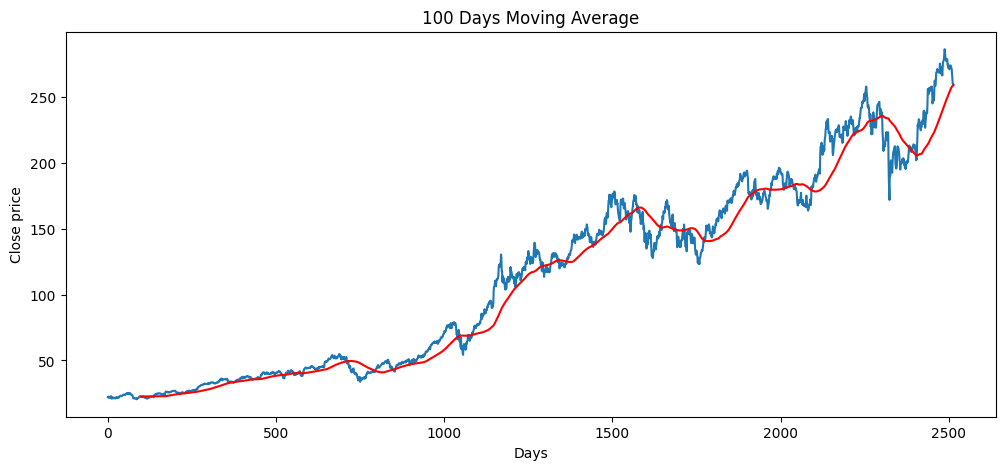

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')

plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')



#### 200 Days Moving Average

In [18]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600,NaN,NaN
1,2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800,NaN,NaN
2,2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400,NaN,NaN
3,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400,NaN,NaN
4,2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-10-21,26.737331,26.808418,26.663953,26.785486,92770800,24.114116,NaN
199,2016-10-24,26.978096,26.998733,26.829045,26.851976,94154800,24.161024,23.428327
200,2016-10-25,27.115685,27.140909,26.900134,27.046891,192516000,24.208852,23.452828


Text(0, 0.5, 'price')

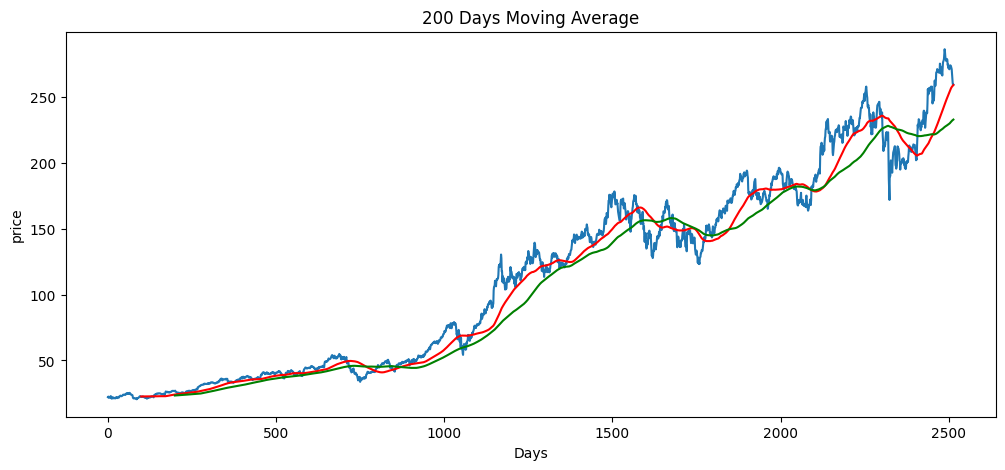

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')

plt.plot(df['MA_200'],'g')

plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('price')



In [20]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600,NaN,NaN
1,2016-01-12,22.537878,22.702471,22.285352,22.670906,196616800,NaN,NaN
2,2016-01-13,21.958427,22.815210,21.938136,22.619052,249758400,NaN,NaN
3,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400,NaN,NaN
4,2016-01-15,21.899801,22.030574,21.500722,21.690115,319335600,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2026-01-05,267.260010,271.510010,266.140015,270.640015,45647200,257.860747,231.964811
2511,2026-01-06,262.359985,267.549988,262.119995,267.000000,52352100,258.153307,232.209759
2512,2026-01-07,260.329987,263.679993,259.809998,263.200012,48309800,258.431061,232.423778


#### Calculating % change in each trading session

In [21]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed' ]]

Price,Close,Percentage Changed
Ticker,AAPL,
0,22.215450,NaN
1,22.537878,0.014514
2,21.958427,-0.025710
3,22.438667,0.021870
4,21.899801,-0.024015
...,...,...
2510,267.260010,-0.013837
2511,262.359985,-0.018334
2512,260.329987,-0.007737


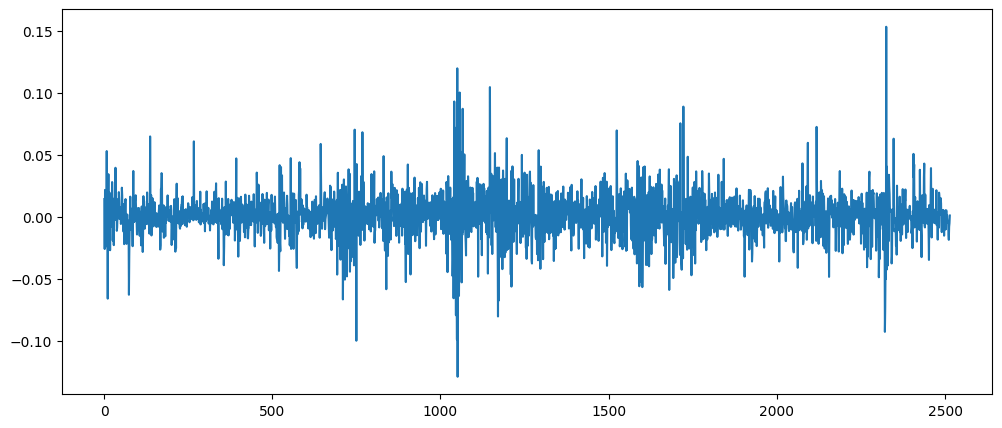

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

#### Data Preprocessing


In [23]:
df.shape

(2515, 9)

In [24]:
# splitting data into Training and Testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)

In [27]:
data_training_array

array([[0.01022018],
       [0.01226518],
       [0.00859001],
       ...,
       [0.65078692],
       [0.65884721],
       [0.65047461]], shape=(1760, 1))

Sequence Creation

In [28]:
x_train =[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)    

In [29]:
x_train

array([[[0.01022018],
        [0.01226518],
        [0.00859001],
        ...,
        [0.01377125],
        [0.01174605],
        [0.01067561]],

       [[0.01226518],
        [0.00859001],
        [0.01163594],
        ...,
        [0.01174605],
        [0.01067561],
        [0.01096493]],

       [[0.00859001],
        [0.01163594],
        [0.00821817],
        ...,
        [0.01067561],
        [0.01096493],
        [0.01199195]],

       ...,

       [[0.92502082],
        [0.92034252],
        [0.94286145],
        ...,
        [0.65684785],
        [0.67915412],
        [0.68115343]],

       [[0.92034252],
        [0.94286145],
        [0.94966057],
        ...,
        [0.67915412],
        [0.68115343],
        [0.65078692]],

       [[0.94286145],
        [0.94966057],
        [0.94866258],
        ...,
        [0.68115343],
        [0.65078692],
        [0.65884721]]], shape=(1660, 100, 1))

#### model building

In [30]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [32]:
model =Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation ='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

#### model training

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0222
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.7745e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.2582e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.9537e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.2624e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.5812e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.8774e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.5591e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.5501e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.8233e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.8241e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.2820e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.5780e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.5322e-04
Epoch 15/50
52/52 ━

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [36]:
model.save('stock_prediction_model.keras')

#### Preparing test data

In [38]:
data_training

Ticker,AAPL
0,22.215450
1,22.537878
2,21.958427
3,22.438667
4,21.899801
...,...
1755,127.683746
1756,127.998970
1757,123.211197
1758,124.482033


In [37]:
data_testing

Ticker,AAPL
1760,127.693581
1761,128.215668
1762,128.787109
1763,131.506058
1764,131.427231
...,...
2510,267.260010
2511,262.359985
2512,260.329987
2513,259.040009


In [40]:
past_100_days= data_training.tail(100)
past_100_days

Ticker,AAPL
1660,170.333481
1661,170.176132
1662,171.671051
1663,171.277634
1664,168.691025
...,...
1755,127.683746
1756,127.998970
1757,123.211197
1758,124.482033


In [42]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,170.333481
1,170.176132
2,171.671051
3,171.277634
4,168.691025
...,...
850,267.260010
851,262.359985
852,260.329987
853,259.040009


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.89346068e-01],
       [2.88380905e-01],
       [2.97550609e-01],
       [2.95137421e-01],
       [2.79271384e-01],
       [2.55442192e-01],
       [2.53390846e-01],
       [2.55200620e-01],
       [2.70282696e-01],
       [2.31612719e-01],
       [2.18099408e-01],
       [2.03198628e-01],
       [1.93003111e-01],
       [1.97467458e-01],
       [1.84497004e-01],
       [1.76774952e-01],
       [1.85401798e-01],
       [1.76352833e-01],
       [1.93907998e-01],
       [2.30466354e-01],
       [1.72612546e-01],
       [1.81480589e-01],
       [1.63744409e-01],
       [1.53669725e-01],
       [1.76473479e-01],
       [1.91072785e-01],
       [1.71888674e-01],
       [1.65976395e-01],
       [1.52040872e-01],
       [1.54092124e-01],
       [1.60064398e-01],
       [1.48481600e-01],
       [1.04080266e-01],
       [7.82603780e-02],
       [1.03899438e-01],
       [1.25919137e-01],
       [1.27728911e-01],
       [1.21877002e-01],
       [8.96621611e-02],
       [9.16531374e-02],


In [44]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [46]:
x_test

array([[[2.89346068e-01],
        [2.88380905e-01],
        [2.97550609e-01],
        ...,
        [3.02034611e-04],
        [8.09723249e-03],
        [0.00000000e+00]],

       [[2.88380905e-01],
        [2.97550609e-01],
        [2.95137421e-01],
        ...,
        [8.09723249e-03],
        [0.00000000e+00],
        [2.77965906e-02]],

       [[2.97550609e-01],
        [2.95137421e-01],
        [2.79271384e-01],
        ...,
        [0.00000000e+00],
        [2.77965906e-02],
        [3.09990279e-02]],

       ...,

       [[6.71004846e-01],
        [6.63712493e-01],
        [6.59422984e-01],
        ...,
        [9.06887231e-01],
        [8.83885054e-01],
        [8.53828726e-01]],

       [[6.63712493e-01],
        [6.59422984e-01],
        [6.57400746e-01],
        ...,
        [8.83885054e-01],
        [8.53828726e-01],
        [8.41376888e-01]],

       [[6.59422984e-01],
        [6.57400746e-01],
        [6.29518375e-01],
        ...,
        [8.53828726e-01],
        [8.4137

#### Making Predcitions

In [47]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [48]:
y_predicted

array([[0.00947176],
       [0.0114397 ],
       [0.01695407],
       [0.0234074 ],
       [0.03240684],
       [0.0402056 ],
       [0.04735585],
       [0.05411496],
       [0.05800732],
       [0.05977913],
       [0.06397328],
       [0.0729873 ],
       [0.0840239 ],
       [0.09215485],
       [0.10005774],
       [0.10884719],
       [0.11135871],
       [0.11255586],
       [0.11473951],
       [0.1251484 ],
       [0.14220099],
       [0.15312183],
       [0.16311519],
       [0.16560219],
       [0.16274309],
       [0.15924376],
       [0.16115269],
       [0.163859  ],
       [0.16968137],
       [0.1725854 ],
       [0.17164704],
       [0.16293839],
       [0.15430379],
       [0.14892781],
       [0.14221568],
       [0.13870487],
       [0.13666527],
       [0.13250394],
       [0.1294571 ],
       [0.13556409],
       [0.14825621],
       [0.1566179 ],
       [0.16276902],
       [0.1625664 ],
       [0.15651067],
       [0.15293363],
       [0.15480147],
       [0.159

In [49]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test= scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [50]:
y_predicted

array([124.70612, 125.02695, 125.92595, 126.97802, 128.44518, 129.7166 ,
       130.8823 , 131.9842 , 132.61877, 132.90762, 133.59138, 135.06093,
       136.86021, 138.18579, 139.47417, 140.9071 , 141.31654, 141.51172,
       141.8677 , 143.56467, 146.34471, 148.1251 , 149.75432, 150.15976,
       149.69365, 149.12315, 149.43436, 149.87558, 150.82478, 151.29822,
       151.14523, 149.72548, 148.31781, 147.44136, 146.3471 , 145.77473,
       145.44223, 144.76381, 144.2671 , 145.26271, 147.33188, 148.69507,
       149.69788, 149.66484, 148.67758, 148.09442, 148.39894, 149.1029 ,
       150.53374, 151.64104, 152.94078, 154.45462, 155.23015, 155.78839,
       156.4653 , 156.46713, 156.04611, 156.44461, 157.50497, 159.2413 ,
       161.10071, 162.30287, 162.35445, 162.205  , 161.29008, 160.03505,
       158.84795, 159.57166, 160.74538, 161.7626 , 162.7588 , 163.76741,
       164.18619, 163.78253, 163.27946, 162.4544 , 161.76791, 162.67038,
       164.29214, 165.68356, 166.24783, 165.99644, 

In [51]:
y_test

array([127.69358063, 128.21566772, 128.78710938, 131.50605774,
       131.42723083, 132.75718689, 133.91967773, 133.20050049,
       133.25959778, 135.82099915, 139.01281738, 140.41171265,
       139.75167847, 141.82049561, 143.76118469, 140.87475586,
       142.14553833, 143.26858521, 148.57850647, 152.20381165,
       149.47499084, 152.35159302, 149.66217041, 148.6277771 ,
       148.99281311, 151.7948761 , 151.15354919, 153.25511169,
       151.65675354, 150.51225281, 146.49662781, 146.92088318,
       147.40432739, 144.75027466, 145.94410706, 145.44090271,
       143.36898804, 143.96096802, 149.01254272, 151.775177  ,
       149.57493591, 150.82797241, 148.57843018, 146.51634216,
       148.46000671, 150.55171204, 150.94638062, 153.76818848,
       152.92951965, 155.29747009, 157.15234375, 155.72172546,
       156.80703735, 158.10940552, 156.16572571, 155.5440979 ,
       158.6224823 , 160.19122314, 162.69728088, 163.95031738,
       163.41755676, 161.57254028, 162.460495  , 159.86

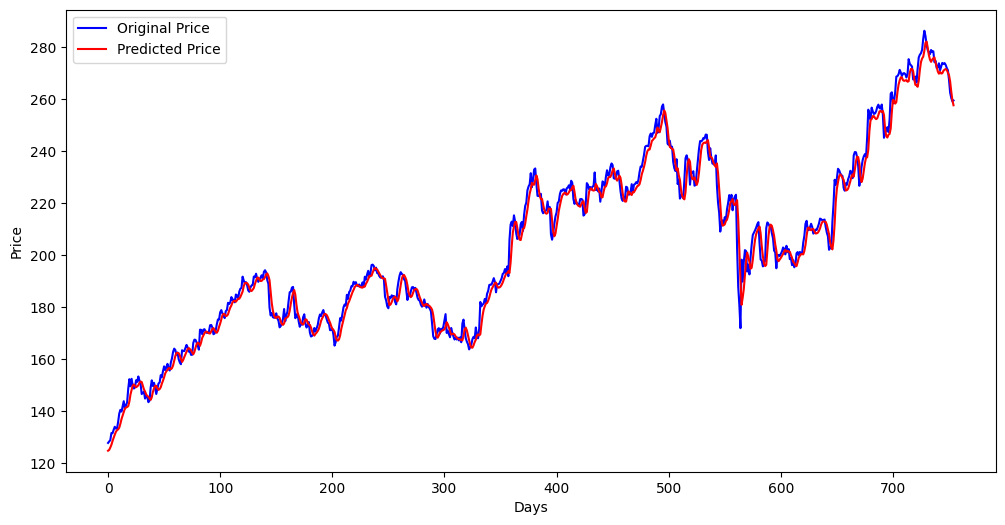

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label ='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

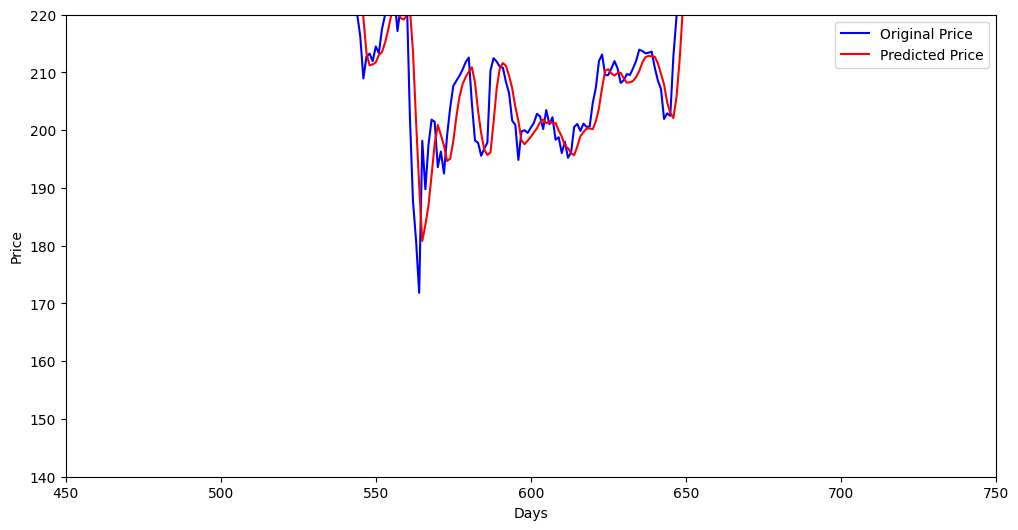

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)


#### Model Evalution


In [58]:
# MsE
from sklearn.metrics import mean_absolute_error,r2_score

In [56]:
mse= mean_absolute_error(y_test, y_predicted)
print(f"MSE:{mse}")

MSE:3.113686133378388


In [57]:
#RMSE
rmse=np.sqrt(mse)
print(f"RMSE:{rmse}")

RMSE:1.764564006597207


In [59]:
# R-squared
r2 = r2_score(y_test,y_predicted)
print(f"R2: {r2}")

R2: 0.9846578619916821
